## Investment Analysis Assignment

You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

**Available Data for Analysis:**
  1. Company details
  2. Funding round details 
  3. Sector Classification
  
**Spark Funds’ business objective:**
  1. **Business objective:** The objective is to identify the best sectors, countries, and a suitable investment type for making                            investments. The overall strategy is to invest where others are investing, implying that the 'best'                            sectors and countries are the ones 'where most investors are investing'.
  
  
  2. **Goals of data analysis:**
      1. Investment type analysis
      2. Country analysis
      3. Sector analysis

# Checkpoints - Part 1
## Checkpoint 1: Data Cleaning

In [1]:
#Import python liberaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read data from files to **pandas dataframe**.

In [2]:
#ABC = pd.read_csv("ABC.csv",encoding='ISO-8859-1')
#ABC
#print(len(ABC.index))
#print(ABC.isnull().sum())
#print(100*(ABC.isnull().sum()/len(ABC.index)))

In [2]:
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')

**Data Analysis of companies DataFrame.**


In [3]:
#The dimensionality of the Companies DataFrame
companies.shape

(66368, 10)

In [5]:
#Information of the Companies DataFrame
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
#Missing values of the Companies DataFrame
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

**Data Analysis of rounds2 DataFrame**

In [7]:
#The dimensionality of the rounds2 DataFrame
rounds2.shape

(114949, 6)

In [8]:
#Information of the rounds2 DataFrame
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
#Missing values of the rounds2 DataFrame
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

The company_permalink colmn of rounds2 dataframe has some entry is in uppercase and some is in lower case.
Before moving further converting company_permalink colmn to lower case. Also for safe side converting the permalink column of   companies dataframe to lower case.          

In [10]:
#Convert 'company_permalink' column of rounds2 and 'permalink' column of companies to lower case.
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

In [11]:
#Unique companies are present in rounds2 and companies.
print(len(rounds2['company_permalink'].unique()))
print(len(companies['permalink'].unique()))

66370
66368


In [12]:
#Are there any companies in the rounds2 file which are not present in companies?
companies.loc[~companies.permalink.isin(rounds2.company_permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [13]:
#Merging datarame rounds2 with dataframe companies
master_frame = pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink',how='left')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


###  Table 1.1: Understand the Data Set 

| Question                                                            | Answer                  |
|---------------------------------------------------------------------|------------------------ |    
| How many unique companies are present in rounds2?	                  | **66370**               |
|---------------------------------------------------------------------|-------------------------|
| How many unique companies are present in companies?                 | **66368**               |
|---------------------------------------------------------------------|-------------------------|   
| In the companies data frame, which column can be used as            | **'permalink' column**  |
| the unique key for each company? Write the name of the column.      |                         |  
|---------------------------------------------------------------------|-------------------------|
| Are there any companies in the rounds2 file which are not present   |                         |
| in companies? Answer yes or no: Y/N                                 |   **Y**                 |
|---------------------------------------------------------------------|-------------------------|
| Merge the two data frames so that all variables (columns) in the    | **Number of Row:**      |
| companies frame are added to the rounds2 data frame.                |  **114949**             |
| Name the merged frame master_frame.                                 |  **Number of column:**  |
| How many observations are present in master_frame?                  |  **16**                 |
|---------------------------------------------------------------------|-------------------------|

### Data Cleaning

In [13]:
#Check how much % of data is missing from master_frame dataframe.
print(100*(master_frame.isnull().sum()/len(master_frame.index)))

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
permalink                   0.006090
name                        0.006960
homepage_url                5.340629
category_list               2.970013
status                      0.006090
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.857485
dtype: float64


In [14]:
#As looking to Goals of data analysis 'funding_round_code', 'founded_at', 'homepage_url' column will not be 
#required for further analysis, so its better to drop these column.
master_frame = master_frame.drop(['funding_round_code', 'founded_at', 'homepage_url'], axis=1)

In [15]:
#Removing Null values from column raised_amount_usd
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]
master_frame = master_frame[master_frame['status']!='closed']
master_frame.info()
len(master_frame.name.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87904 entries, 0 to 114948
Data columns (total 13 columns):
company_permalink          87904 non-null object
funding_round_permalink    87904 non-null object
funding_round_type         87904 non-null object
funded_at                  87904 non-null object
raised_amount_usd          87904 non-null float64
permalink                  87903 non-null object
name                       87903 non-null object
category_list              87270 non-null object
status                     87903 non-null object
country_code               83277 non-null object
state_code                 81660 non-null object
region                     82186 non-null object
city                       82189 non-null object
dtypes: float64(1), object(12)
memory usage: 9.4+ MB


48854

## Checkpoint 2: Funding Type Analysis

In [16]:
#Just for simplicity of calculation Convert column 'raised_amount_usd' in million USD from USD.
master_frame['raised_amount_millionUsd'] = master_frame['raised_amount_usd'].apply(lambda value: value/1000000)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87904 entries, 0 to 114948
Data columns (total 14 columns):
company_permalink           87904 non-null object
funding_round_permalink     87904 non-null object
funding_round_type          87904 non-null object
funded_at                   87904 non-null object
raised_amount_usd           87904 non-null float64
permalink                   87903 non-null object
name                        87903 non-null object
category_list               87270 non-null object
status                      87903 non-null object
country_code                83277 non-null object
state_code                  81660 non-null object
region                      82186 non-null object
city                        82189 non-null object
raised_amount_millionUsd    87904 non-null float64
dtypes: float64(2), object(12)
memory usage: 10.1+ MB


In [17]:
#Most representative value of the investment amount for funding types.
master_frame.groupby('funding_round_type').mean()

,raised_amount_usd,raised_amount_millionUsd
funding_round_type,,
angel,9.799154e+05,0.979915
convertible_note,1.479851e+06,1.479851
debt_financing,1.777407e+07,17.774074
equity_crowdfunding,5.198441e+05,0.519844
grant,4.154314e+06,4.154314
non_equity_assistance,4.028160e+05,0.402816
post_ipo_debt,1.746093e+08,174.609328
post_ipo_equity,8.423386e+07,84.233861
private_equity,7.557581e+07,75.575808


#### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 
### Table 2.1
1.

    a) The most representative value for the investment amount of funding type venture is: 11.90 (millionUsd)
    b) The most representative value for the investment amount of funding type angel is: 0.981574 (millionUsd)
    c) The most representative value for the investment amount of funding type seed is: 0.747794 (millionUsd)
    d) The most representative value for the investment amount of funding type private equity is: 75.575808 (millionUsd)                        
    
2. Based on the most representative investment amount calculated above, which investment type do you think is the most            suitable for Spark Funds?   
   Answer: **Venture**

# Checkpoints - Part 2
## Checkpoint 3: Country Analysis


In [18]:
#Spark Funds wants to invest in countries with the highest amount of funding for the Venture investment type,
#so filtring dataframe for Venture investment type.
df_venture =  master_frame[master_frame['funding_round_type'] == 'venture']
top9 =  df_venture[df_venture['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    3.999351e+11
CHN    3.910177e+10
GBR    1.824134e+10
IND    1.405060e+10
CAN    8.825487e+09
FRA    6.775044e+09
ISR    6.503021e+09
DEU    6.061141e+09
JPN    3.242032e+09
Name: raised_amount_usd, dtype: float64

### The Top 3 English-Speaking Countries
### Table 3.1: Analysing the Top 3 English-Speaking Countries

 1. Top English-speaking country	   USA            
 2. Second English-speaking country	   GBR 
 3. Third English-speaking country     IND

## Checkpoint 4: Sector Analysis 1

### Extract the primary sector of each category list from the category_list column

In [19]:
#Extract the primary sector of each category list from the category_list column
df_primary_sector = df_venture['category_list'].str.split('|',n=1,expand=True)
type(df_primary_sector)
df_venture['primary_Sector']=df_primary_sector[0]

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
#df_venture = df_venture.drop('primary_Sector', axis=1)
df_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46641 entries, 0 to 114941
Data columns (total 15 columns):
company_permalink           46641 non-null object
funding_round_permalink     46641 non-null object
funding_round_type          46641 non-null object
funded_at                   46641 non-null object
raised_amount_usd           46641 non-null float64
permalink                   46641 non-null object
name                        46641 non-null object
category_list               46355 non-null object
status                      46641 non-null object
country_code                44949 non-null object
state_code                  44253 non-null object
region                      44400 non-null object
city                        44400 non-null object
raised_amount_millionUsd    46641 non-null float64
primary_Sector              46355 non-null object
dtypes: float64(2), object(13)
memory usage: 5.7+ MB


### Read data from **mapping.csv** to pandas dataframe.

In [31]:
mapping=pd.read_csv('mapping.csv')

### Data Analysis of mapping DataFrame.

In [32]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [33]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [34]:
# Arrange mapping datafreame using melt function.
df_melt_mapping = pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'], var_name ='main_sector')

In [35]:
# As we are not interested value=0 , so filtering df_melt_mapping dataframe for value 1
df_melt_mapping = df_melt_mapping[df_melt_mapping.value==1]

In [36]:
#Rename category_list column of df_melt_mapping to primary_Sector
df_melt_mapping =  df_melt_mapping.rename(columns={'category_list':'primary_Sector'})

In [37]:
# For further analysis we dont require vale column of df_melt_mapping, so droping it.
df_melt_mapping = df_melt_mapping.drop('value',axis=1)

### Code for a merged data frame with each primary sector mapped to its main sector 

In [38]:
df_mapped_primarySector_mainSector = pd.merge(df_venture,df_melt_mapping,on='primary_Sector',how='inner')

In [39]:
df_mapped_primarySector_mainSector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43573 entries, 0 to 43572
Data columns (total 16 columns):
company_permalink           43573 non-null object
funding_round_permalink     43573 non-null object
funding_round_type          43573 non-null object
funded_at                   43573 non-null object
raised_amount_usd           43573 non-null float64
permalink                   43573 non-null object
name                        43573 non-null object
category_list               43287 non-null object
status                      43573 non-null object
country_code                41962 non-null object
state_code                  41307 non-null object
region                      41426 non-null object
city                        41426 non-null object
raised_amount_millionUsd    43573 non-null float64
primary_Sector              43287 non-null object
main_sector                 43573 non-null object
dtypes: float64(2), object(14)
memory usage: 5.7+ MB


## Checkpoint 5: Sector Analysis 2

### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range.

#### Data frames D1 for country USA

In [40]:
#Filter data for country USA from df_mapped_primarySector_mainSector dataframe 
D1 = df_mapped_primarySector_mainSector[df_mapped_primarySector_mainSector['country_code'] == 'USA']
#Filter data between 5-15 million USD range from D1 dataframe.
D1 = D1[D1['raised_amount_millionUsd'].between(5.0,15.0,inclusive=True)]
D1_main_sector=D1.groupby('main_sector')
# The total number (or count) of investments for each main sector 
D1['total_number_investments']  =  D1.groupby('main_sector')['main_sector'].transform('count')
#The total amount invested in each main sector 
D1['total_amount_investments'] =D1.groupby('main_sector')['raised_amount_millionUsd'].transform('sum')

#### Data frames D2 for country GBR

In [41]:
#Filter data for country GBR from df_mapped_primarySector_mainSector dataframe 
D2 = df_mapped_primarySector_mainSector[df_mapped_primarySector_mainSector['country_code'] == 'GBR']
#Filter data between 5-15 million USD range from D2 dataframe.
D2 = D2[D2['raised_amount_millionUsd'].between(5.0,15.0,inclusive=True)]
D2_main_sector=D2.groupby('main_sector')
# The total number (or count) of investments for each main sector 
D2['total_number_investments']  =  D2.groupby('main_sector')['main_sector'].transform('count')
#The total amount invested in each main sector 
D2['total_amount_investments'] =D2.groupby('main_sector')['raised_amount_millionUsd'].transform('sum')

#### Data frames D3 for country IND

In [42]:
#Filter data for country GBR from df_mapped_primarySector_mainSector dataframe 
D3 = df_mapped_primarySector_mainSector[df_mapped_primarySector_mainSector['country_code'] == 'IND']
#Filter data between 5-15 million USD range from D2 dataframe.
D3 = D3[D3['raised_amount_millionUsd'].between(5.0,15.0,inclusive=True)]
D3_main_sector=D3.groupby('main_sector')
# The total number (or count) of investments for each main sector 
D3['total_number_investments']  =  D3.groupby('main_sector')['main_sector'].transform('count')
#The total amount invested in each main sector 
D3['total_amount_investments'] =D3.groupby('main_sector')['raised_amount_millionUsd'].transform('sum')

#### 1. Total number of investments (count)

In [43]:
D1.shape[0]

10461

In [44]:
D2.shape[0]


547

In [45]:
D3.shape[0]

289

#### 2. Total amount of investment (USD)

In [46]:
D1.raised_amount_usd.sum()

93711335580.0

In [47]:
D2.raised_amount_usd.sum()

4768984985.0

In [48]:
D3.raised_amount_usd.sum()

2596667552.0

####  3. Top sector (based on count of investments)

In [49]:
top_sector=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector

'Others'

In [50]:
top_sector=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector

'Others'

In [51]:
top_sector=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector

'Others'

#### 4. Second-best sector (based on count of investments)

In [52]:
Second_best=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
Second_best

'Cleantech / Semiconductors'

In [53]:
Second_best=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
Second_best

'Cleantech / Semiconductors'

In [54]:
Second_best=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
Second_best

'News, Search and Messaging'

 ### 5. Third-best sector (based on count of investments)

In [55]:
third_best=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best

'Social, Finance, Analytics, Advertising'

In [56]:
third_best=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best

'Social, Finance, Analytics, Advertising'

In [57]:
third_best=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_best

'Social, Finance, Analytics, Advertising'

#### 6. Number of investments in the top sector (refer to point 3)

In [58]:
D1[D1.main_sector == top_sector].shape[0]

2732

In [59]:
D2[D2.main_sector == top_sector].shape[0]

137

In [60]:
D3[D3.main_sector == top_sector].shape[0]

102

#### 7. Number of investments in the second-best sector (refer to point 4)

In [61]:
D1[D1.main_sector == Second_best].shape[0]

1445

In [62]:
D2[D2.main_sector == Second_best].shape[0]

66

In [63]:
D3[D3.main_sector == Second_best].shape[0]

49

####  8. Number of investments in the third-best sector (refer to point 5)

In [64]:
D1[D1.main_sector == third_best].shape[0]

1813

In [65]:
D2[D2.main_sector == third_best].shape[0]

95

In [66]:
D3[D3.main_sector == third_best].shape[0]

32

#### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [67]:
D1[D1.main_sector == top_sector].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Code Green Networks'

In [68]:
D2[D2.main_sector == top_sector].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Notonthehighstreet'

In [69]:
D3[D3.main_sector == top_sector].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'ItzCash Card Ltd.'

#### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [70]:
D1[D1.main_sector == Second_best].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Media Temple'

In [71]:
D2[D2.main_sector == Second_best].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Kaazing'

In [72]:
D3[D3.main_sector == Second_best].sort_values(by = 'raised_amount_usd', ascending = False).head(1)['name'].values[0]

'Mobile2Win India'

## Checkpoint 6: Plots

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Aniket-PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


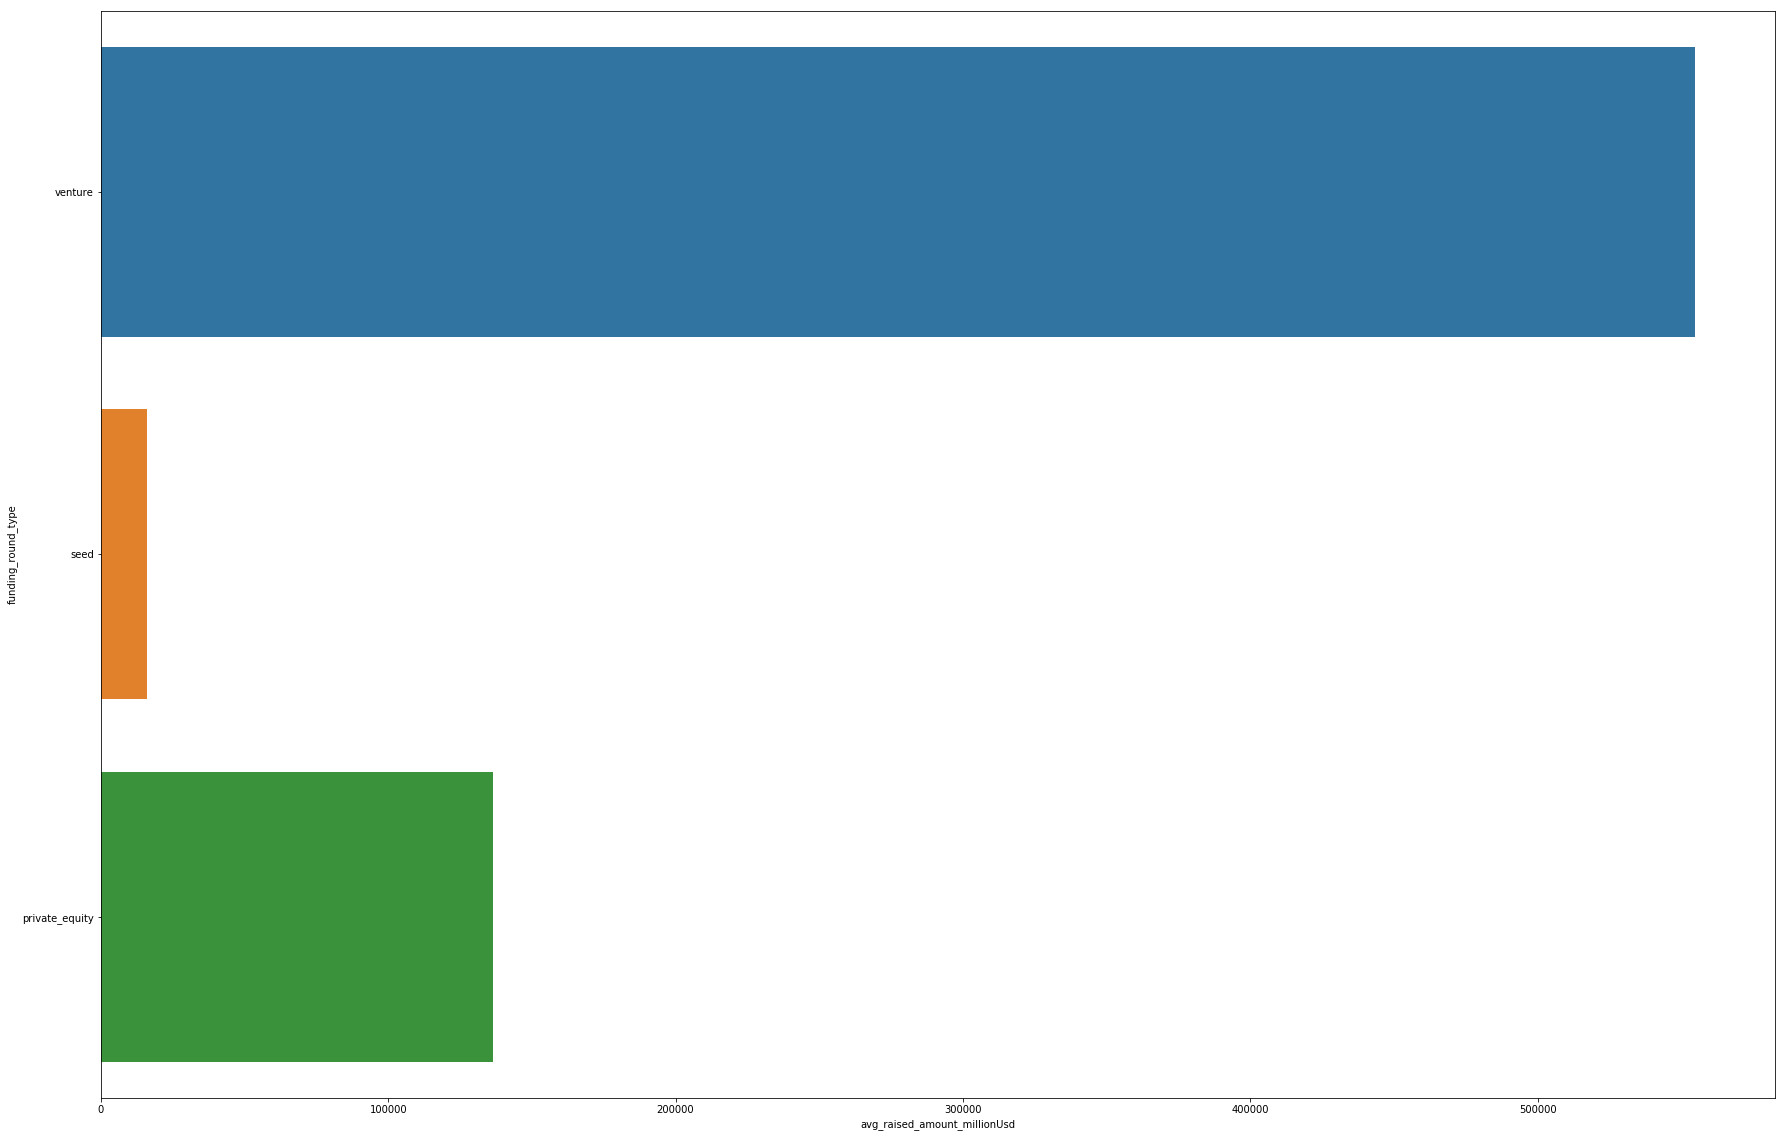

In [73]:
#1 A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of
#investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited
#for Spark Funds.
funding_type =  master_frame[master_frame['funding_round_type'].isin(['private_equity', 'seed', 'venture'])]
funding_type['avg_raised_amount_millionUsd'] = funding_type.groupby('funding_round_type')['raised_amount_millionUsd'].transform('sum')
plt.figure(figsize=(30, 20))
sns.barplot(y='funding_round_type', x='avg_raised_amount_millionUsd' ,data=funding_type)
plt.show()

C:\Users\Aniket-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


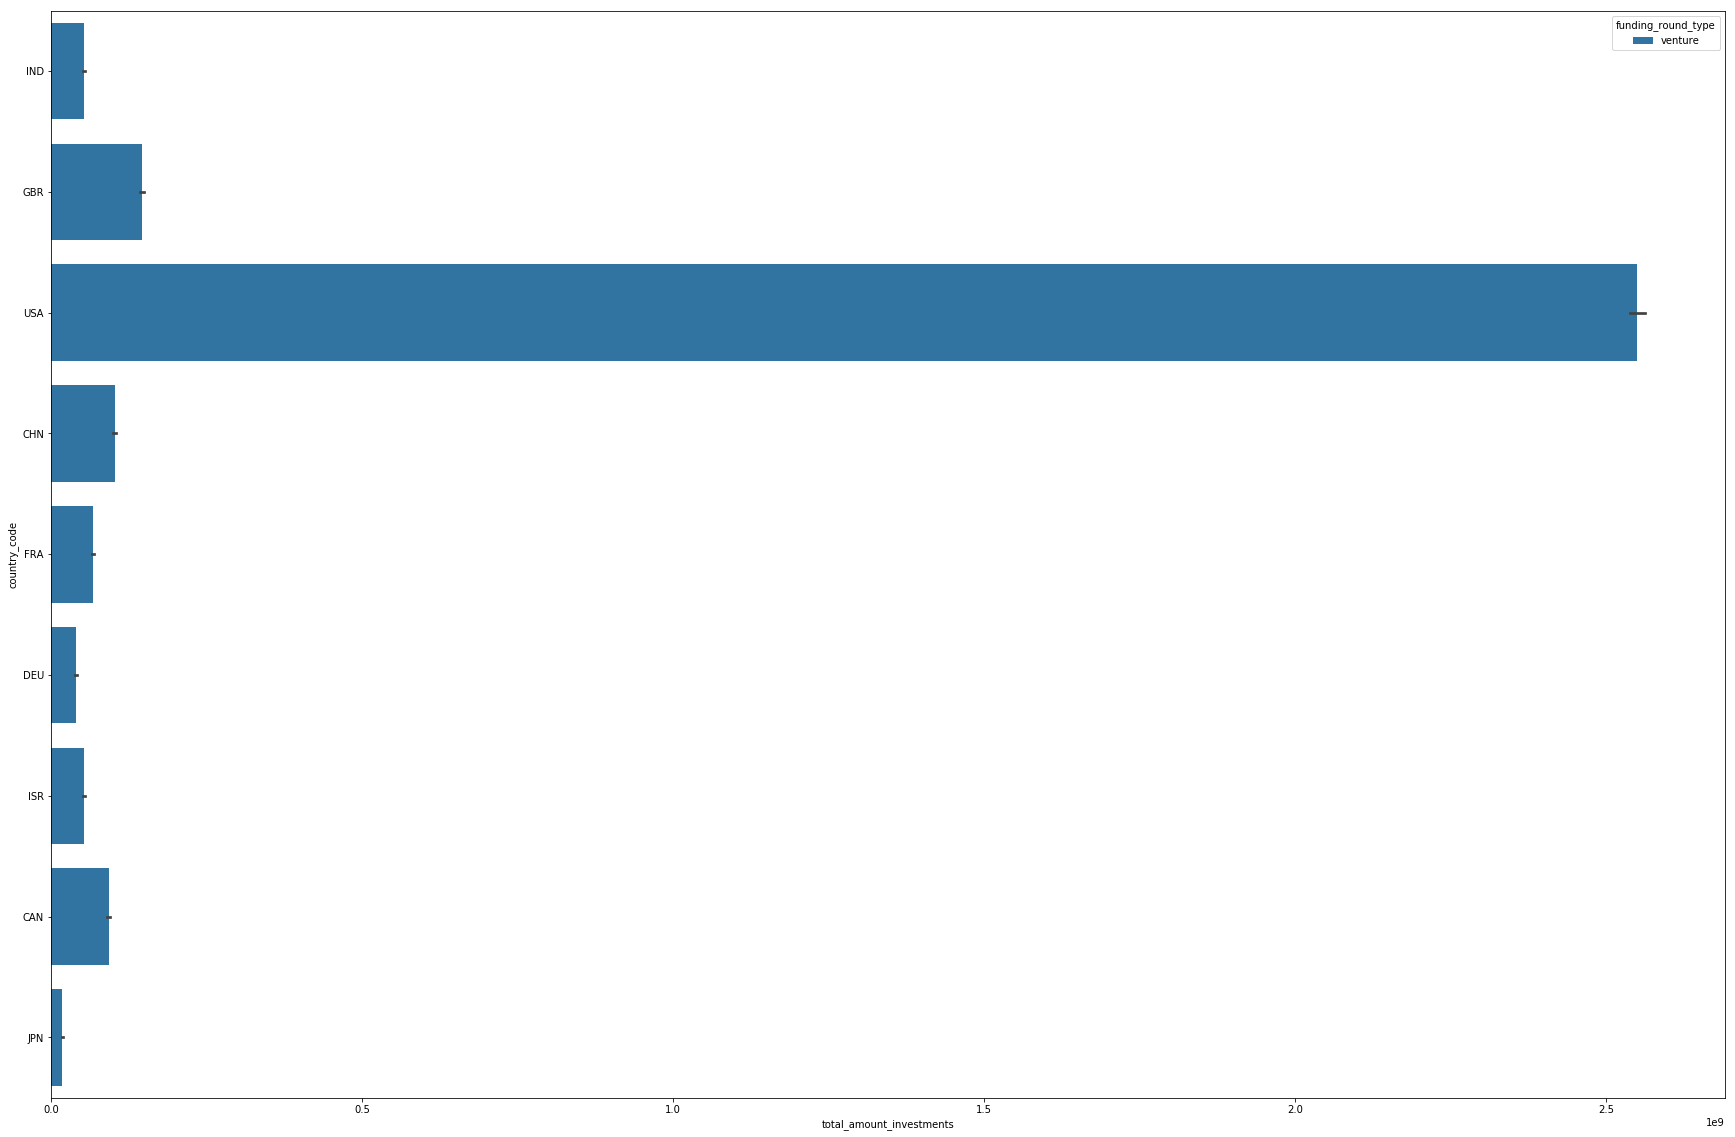

In [74]:
# 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. 
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
top9_country =  df_mapped_primarySector_mainSector[df_mapped_primarySector_mainSector['country_code']
                                                   .isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9_country['total_amount_investments'] =top9_country.groupby('main_sector')['raised_amount_millionUsd'].transform('sum')
top9_country
plt.figure(figsize=(30, 20))
sns.barplot(y='country_code', x='total_amount_investments', hue="funding_round_type", data=top9_country, estimator=np.sum)
plt.show()

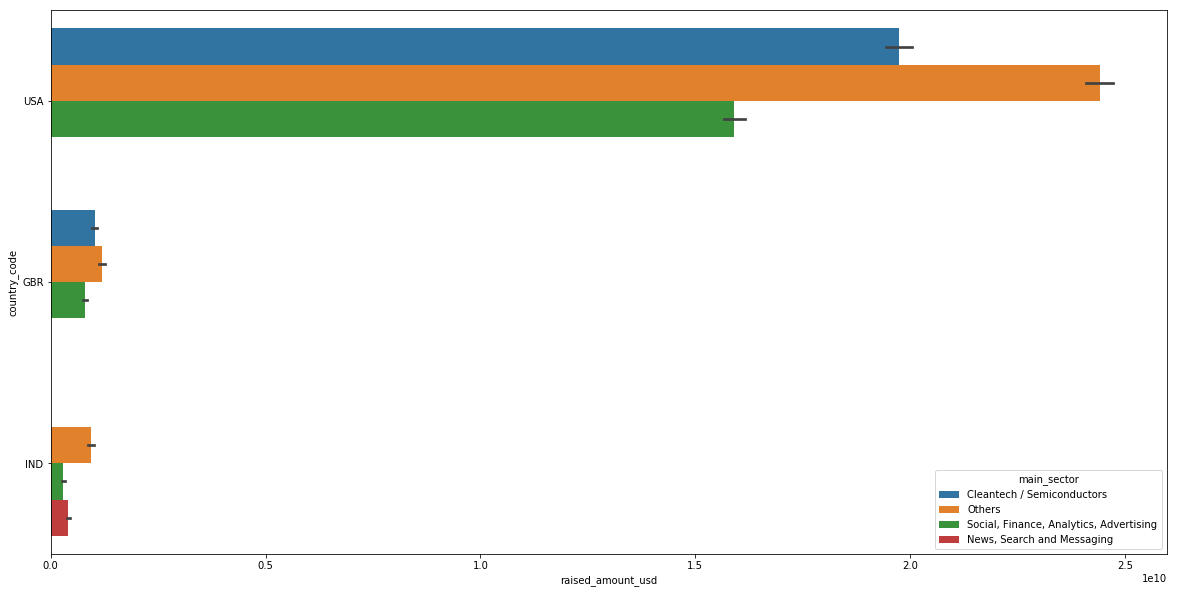

In [75]:
# 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on 
#one chart (for the chosen investment type FT). 

#top 3 sector
D1 = D1[D1['main_sector'].isin(["Others","Cleantech / Semiconductors","Social, Finance, Analytics, Advertising"])]
D2 = D2[D2['main_sector'].isin(["Others","Cleantech / Semiconductors","Social, Finance, Analytics, Advertising"])]
D3 = D3[D3['main_sector'].isin(["Others",'News, Search and Messaging',"Social, Finance, Analytics, Advertising"])]

df_plot_3 = [D1, D2, D3]
df_final_plot = pd.concat(df_plot_3)
df_plot_3
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=df_final_plot, estimator=np.sum)
plt.show()